# Analyse des temps de parole (Work in progress)

In [1]:
#import bibliotheque de fonction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fonction.perso_stats as perso_stats

In [2]:
#import donnée
eu2024 = pd.read_csv('donnee_contruite/temps_paroles_EU2024.csv')

Vue générale :<br>
20 % des interventions sur toute les chaines font 80% des temps de paroles.<br>
Il y a un indice de gini de 0.83 ce qui correspond à une grande inégalité du temps de paroles<br>

indice de gini general : 0.8350381857063337


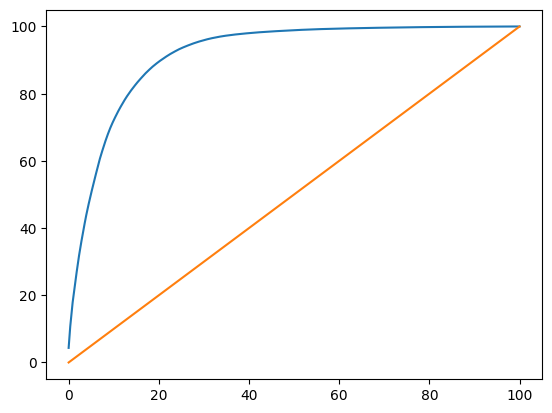

In [3]:
fig,ax =plt.subplots()
print('indice de gini general :',perso_stats.courbe_Lorentz(plt_ax=ax,df=eu2024,colonne='Durée en seconde'))


In [4]:
liste_media = list(eu2024['Nom du media'].unique())
liste_type_media = list(eu2024['Type de media'].unique())

indice de gini TV info continue: 0.8353087165960816
indice de gini TV généraliste: 0.7927357466116464
indice de gini radio: 0.8308635201789323


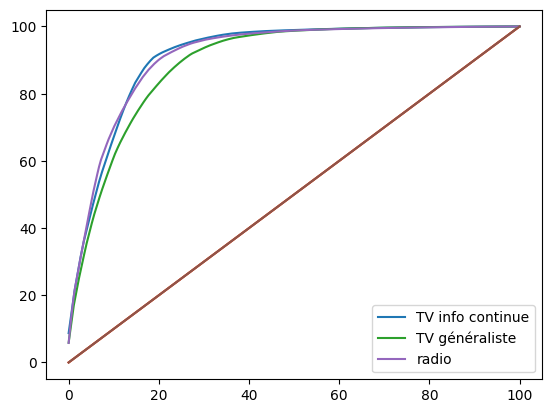

In [5]:
fig,ax =plt.subplots()
for type in liste_type_media:
    data=eu2024[eu2024['Type de media']==type]
    print('indice de gini '+type+':',perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=type))
    ax.legend()


Les radios fournissent en général plus d'égalité du temps de parole.<br>
Enfin juste un peu<br>

In [6]:
liste_media

['BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_']

RMC decouverte et BFM business n ont pas de temps de paroles, division par 0 je dois les enlever

indice de gini BFMTV: 0.8930529503784819
indice de gini C8: 0.819470394948779
indice de gini Cnews: 0.8784005539378835
indice de gini Euronews: 0.9821627647714598
indice de gini Europe1: 0.8856436491879762
indice de gini France2: 0.8531068132947155
indice de gini France24: 0.8672666631372755
indice de gini France3: 0.5845730884213355
indice de gini France5: 0.9252494076747003
indice de gini FranceCulture: 0.858325696727939
indice de gini FranceInfo: 0.8760380119935486
indice de gini FranceInter: 0.8728709298643734
indice de gini LCI: 0.9107262011044979
indice de gini M6: 0.703721374045802
indice de gini RFI: 0.7818783423915011
indice de gini RMC-Story: 0.8147098821396186
indice de gini RMC: 0.8940123730049134
indice de gini RTL: 0.8724886371121793
indice de gini RadioClassique: 0.7189487395601871
indice de gini SudRadio: 0.8167540423526639
indice de gini TF1: 0.7961199568884098
indice de gini TMC: 0.8117982852237124
indice de gini TV5Monde: 0.8032885734826872
indice de gini franceinfo_

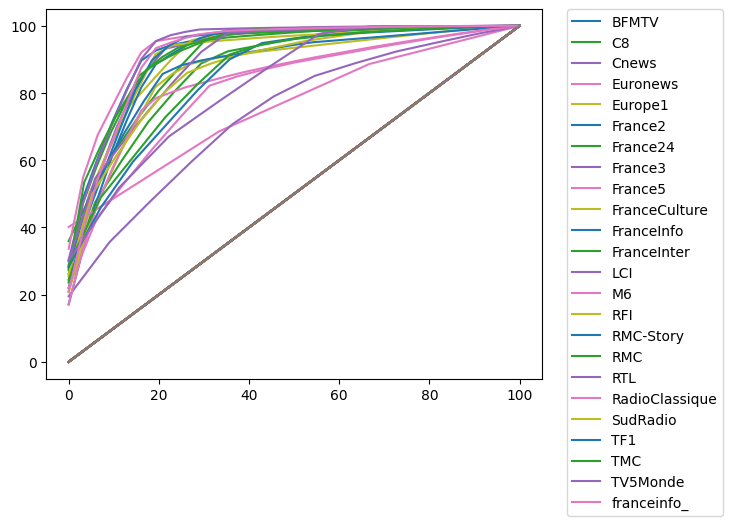

In [7]:
fig,ax =plt.subplots()
liste_media=[#'BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 #'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_'
 ]
 
dico_gini_media = {}
for media in liste_media:
    data=eu2024[eu2024['Nom du media']==media]
    indice = perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=media)
    print('indice de gini '+media+':',indice)
    dico_gini_media[media] = float(indice)
    ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Classement des medias du moins égalitaire au plus égalitaire selon l indice de Gini :

In [8]:
for key in sorted(dico_gini_media, key = dico_gini_media.get, reverse=True) :
    print (key,':', dico_gini_media[key])

Euronews : 0.9821627647714598
France5 : 0.9252494076747003
LCI : 0.9107262011044979
RMC : 0.8940123730049134
BFMTV : 0.8930529503784819
Europe1 : 0.8856436491879762
franceinfo_ : 0.8802163223239556
Cnews : 0.8784005539378835
FranceInfo : 0.8760380119935486
FranceInter : 0.8728709298643734
RTL : 0.8724886371121793
France24 : 0.8672666631372755
FranceCulture : 0.858325696727939
France2 : 0.8531068132947155
C8 : 0.819470394948779
SudRadio : 0.8167540423526639
RMC-Story : 0.8147098821396186
TMC : 0.8117982852237124
TV5Monde : 0.8032885734826872
TF1 : 0.7961199568884098
RFI : 0.7818783423915011
RadioClassique : 0.7189487395601871
M6 : 0.703721374045802
France3 : 0.5845730884213355


Cette liste est concu avec une regle : chaque liste doit avoir le meme temps de parole. Ainsi une chaine qui lutte contre les autres en mettant en avant une liste peut representative va donc etre classé non égalitaire.<br>
travail en cours : faire des couleurs pour classé les partie en fonction de leurs couleur politique.<br>
classé les media en fonction de leur preference politique<br>
faire un rendement voie/temps d'antenne pour voir si il y a un influence du temps d'antenne sur les voies<br>


Vue générale :

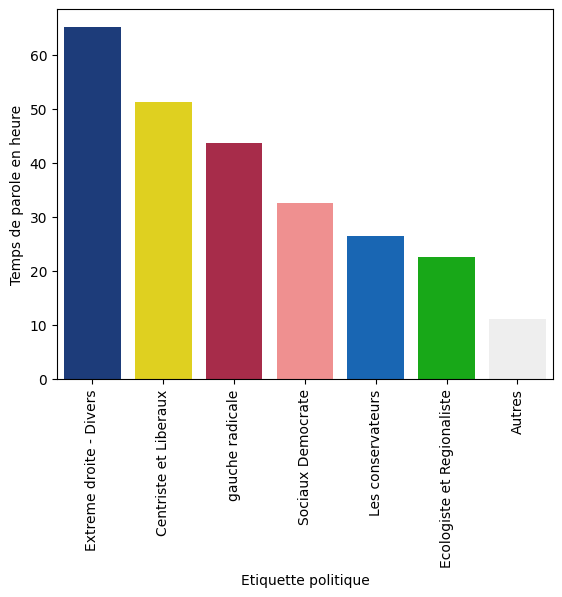

In [15]:
# preparation data
eu2024_couleur_gen = eu2024.groupby(by='Couleur').agg({'Durée en seconde':'sum'}).reset_index()
eu2024_couleur_gen["Temps de parole en heure"] = eu2024_couleur_gen['Durée en seconde']/3600
eu2024_couleur_gen = eu2024_couleur_gen.sort_values(by='Temps de parole en heure',ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#0D378A", "#ffeb00","#bb1840","#ff8080","#0066cc","#00c000","#eeeeee"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
sns.barplot(data=eu2024_couleur_gen,x='Couleur',y='Temps de parole en heure',hue='Couleur')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()


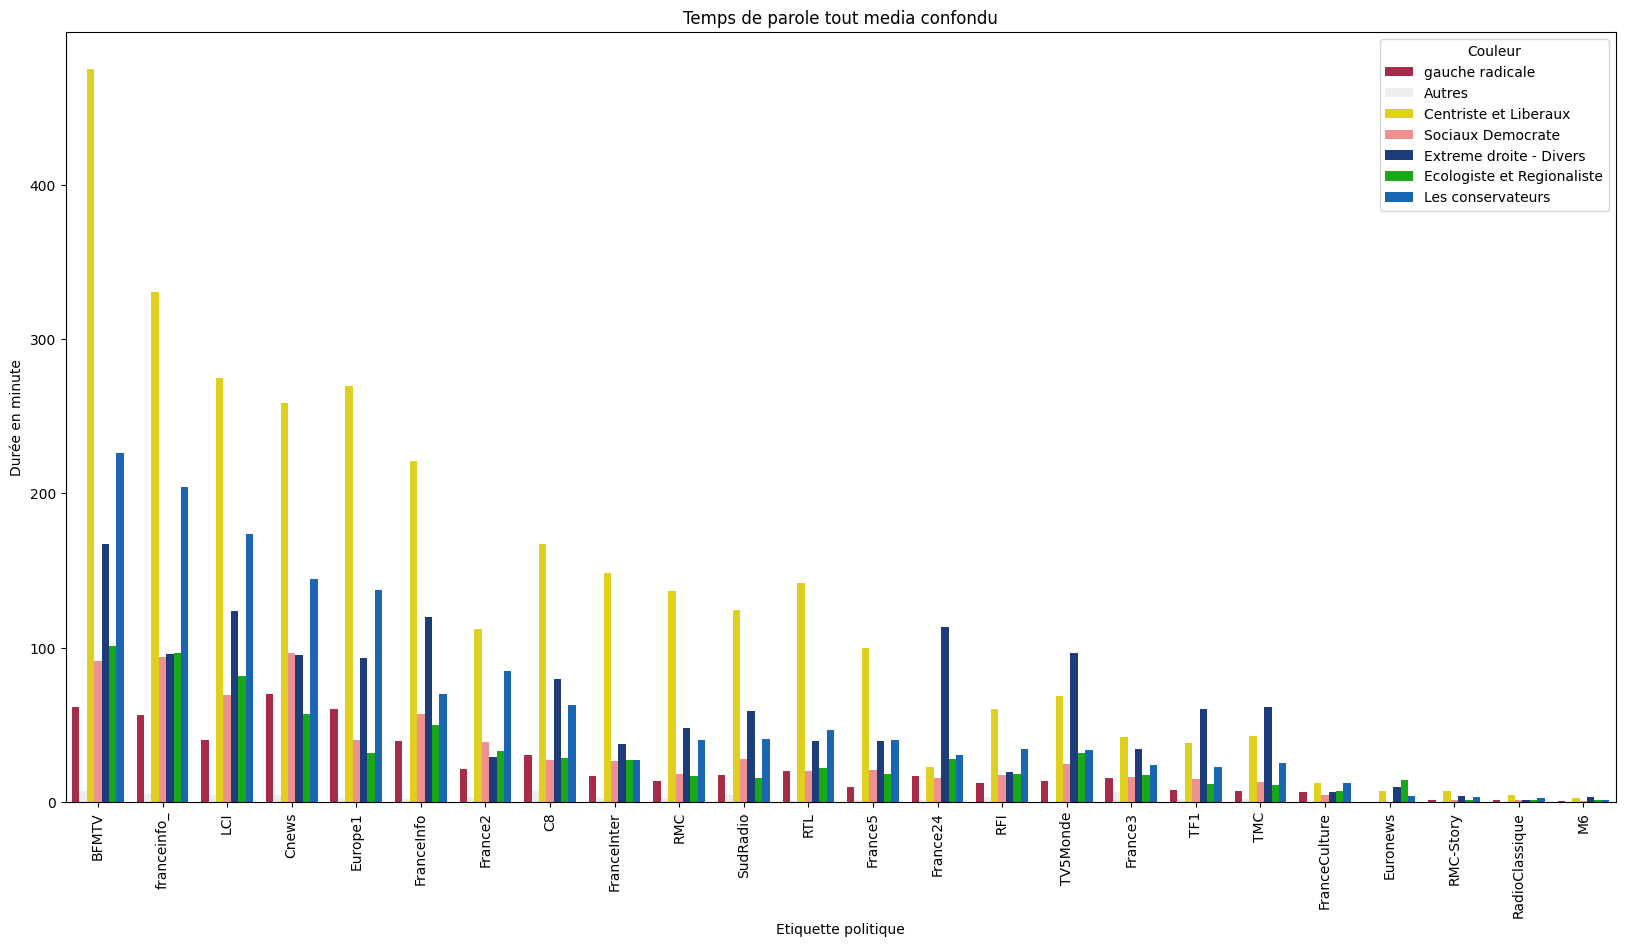

In [30]:
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#bb1840", "#eeeeee","#ffeb00","#ff8080","#0D378A","#00c000","#0066cc"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Durée en minute',hue='Couleur',errorbar=None)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()

In [16]:
eu2024

,Listes candidates,Total période (durée),Nom du media,Type de media,Durée en seconde,Durée en minute,Temps total,Couleur
0,ALLIANCE RURALE,00:20:23,BFMTV,TV info continue,1223,20.383333,159919,Autres
1,BESOIN D?EUROPE,07:55:17,BFMTV,TV info continue,28517,475.283333,159919,Centriste et Liberaux
2,CHANGER L?EUROPE,00:19:42,BFMTV,TV info continue,1182,19.700000,159919,Sociaux Democrate
3,DEFENDRE LES ENFANTS,00:02:05,BFMTV,TV info continue,125,2.083333,159919,Autres
4,DEMOCRATIE REPRESENTATIVE,00:02:00,BFMTV,TV info continue,120,2.000000,159919,Autres
...,...,...,...,...,...,...,...,...
559,"POUR UN MONDE SANS FRONTIERES NI PATRONS, URGE...",00:00:43,franceinfo_,TV info continue,43,0.716667,128677,gauche radicale
560,POUR UNE AUTRE EUROPE,00:01:34,franceinfo_,TV info continue,94,1.566667,128677,Autres
561,POUR UNE DEMOCRATIE REELLE: DECIDONS NOUS-MEMES!,00:02:22,franceinfo_,TV info continue,142,2.366667,128677,Autres
562,POUR UNE HUMANITE SOUVERAINE,00:00:21,franceinfo_,TV info continue,21,0.350000,128677,Autres
